<a href="https://colab.research.google.com/github/JuanCVanegas/Data-Science/blob/main/Problema_para_Data_Scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Predicción de Ventas con Limpieza de Datos

### Tipo de Problema:
Predicción.



### Problema de Negocio:
Analizar y predecir las ventas de una empresa de E-Commerce.



### Meta de Negocio:
Proporcionar información basada en datos y recomendaciones prácticas al equipo gerencial con el fin de optimizar estratégicamente las operaciones.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
!pip install pycaret -q
from pycaret.classification import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [ ]:
# Configuración de Datos Ficticios
np.random.seed(42)
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
num_days = (end_date - start_date).days
products = ['A', 'B', 'C']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

In [ ]:
# Generar datos ficticios
data = {
    'Fecha': [start_date + timedelta(days=np.random.randint(num_days)) for _ in range(1000)],
    'Producto': np.random.choice(products, size=1000),
    'Ventas': np.random.randint(1, 100, size=1000),
    'Precio': np.random.uniform(10, 100, size=1000),
    'Publicidad': np.random.uniform(0, 50, size=1000),
    'Competencia': np.random.choice([0, 1], size=1000),
    'Temporada': np.random.choice(seasons, size=1000),
    'Promocion': np.random.choice([0, 1], size=1000)
}

In [ ]:
# Crear DataFrame
df = pd.DataFrame(data)

# Guardar el conjunto de datos en un archivo CSV
df.to_csv('ventas_dataset.csv', index=False)



In [ ]:
df.head()

,Fecha,Producto,Ventas,Precio,Publicidad,Competencia,Temporada,Promocion
0,2022-04-13,B,12,53.881407,2.591790,0,Winter,1
1,2022-12-15,A,3,13.025224,27.442933,1,Fall,0
2,2022-09-28,B,18,15.638788,14.381636,1,Fall,1
3,2022-04-17,A,40,91.579371,15.338830,1,Spring,0
4,2022-03-13,C,21,22.532083,17.647925,0,Fall,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        1000 non-null   datetime64[ns]
 1   Producto     1000 non-null   object        
 2   Ventas       1000 non-null   int64         
 3   Precio       1000 non-null   float64       
 4   Publicidad   1000 non-null   float64       
 5   Competencia  1000 non-null   int64         
 6   Temporada    1000 non-null   object        
 7   Promocion    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 62.6+ KB


# PASO 1: Función para Determinar Temporada

In [ ]:

def determinar_temporada(row):
    fecha = row['Fecha']
    if datetime(fecha.year, 3, 20) <= fecha < datetime(fecha.year, 6, 21):
        return 'Spring'
    elif datetime(fecha.year, 6, 21) <= fecha < datetime(fecha.year, 9, 22):
        return 'Summer'
    elif datetime(fecha.year, 9, 22) <= fecha < datetime(fecha.year, 12, 21):
        return 'Fall'
    else:
        return 'Winter'



# PASO 2: Corregir Incosistencias Temporales

In [ ]:

# Crear una copia del DataFrame original para comparar cambios
df_copia = df.copy()

# Aplicar la función para corregir la temporada
df['Temporada'] = df.apply(determinar_temporada, axis=1)

# Contar cuántos registros han cambiado
registros_corregidos = (df['Temporada'] != df_copia['Temporada']).sum()

# Mostrar el número de registros cambiados
print(f'Se cambiaron {registros_corregidos} registros al corregir las temporadas.')

# Guardar el conjunto de datos corregido en un nuevo archivo CSV
df.to_csv('ventas_dataset_corregido.csv', index=False)

Se cambiaron 750 registros al corregir las temporadas.


#PASO 3: Realizar análisis exploratorio de datos (EDA)

In [ ]:
df.head()

,Fecha,Producto,Ventas,Precio,Publicidad,Competencia,Temporada,Promocion
0,2022-04-13,B,12,53.881407,2.591790,0,Spring,1
1,2022-12-15,A,3,13.025224,27.442933,1,Fall,0
2,2022-09-28,B,18,15.638788,14.381636,1,Fall,1
3,2022-04-17,A,40,91.579371,15.338830,1,Spring,0
4,2022-03-13,C,21,22.532083,17.647925,0,Winter,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        1000 non-null   datetime64[ns]
 1   Producto     1000 non-null   object        
 2   Ventas       1000 non-null   int64         
 3   Precio       1000 non-null   float64       
 4   Publicidad   1000 non-null   float64       
 5   Competencia  1000 non-null   int64         
 6   Temporada    1000 non-null   object        
 7   Promocion    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Ventas,Precio,Publicidad,Competencia,Promocion
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.022000,55.338368,24.459581,0.501000,0.514000
std,29.038091,26.160770,14.302936,0.500249,0.500054
min,1.000000,10.001047,0.032670,0.000000,0.000000
25%,22.000000,33.896679,12.076389,0.000000,0.000000
50%,46.000000,55.479785,24.155514,1.000000,1.000000
75%,73.000000,78.355535,36.837897,1.000000,1.000000
max,99.000000,99.803877,49.977885,1.000000,1.000000


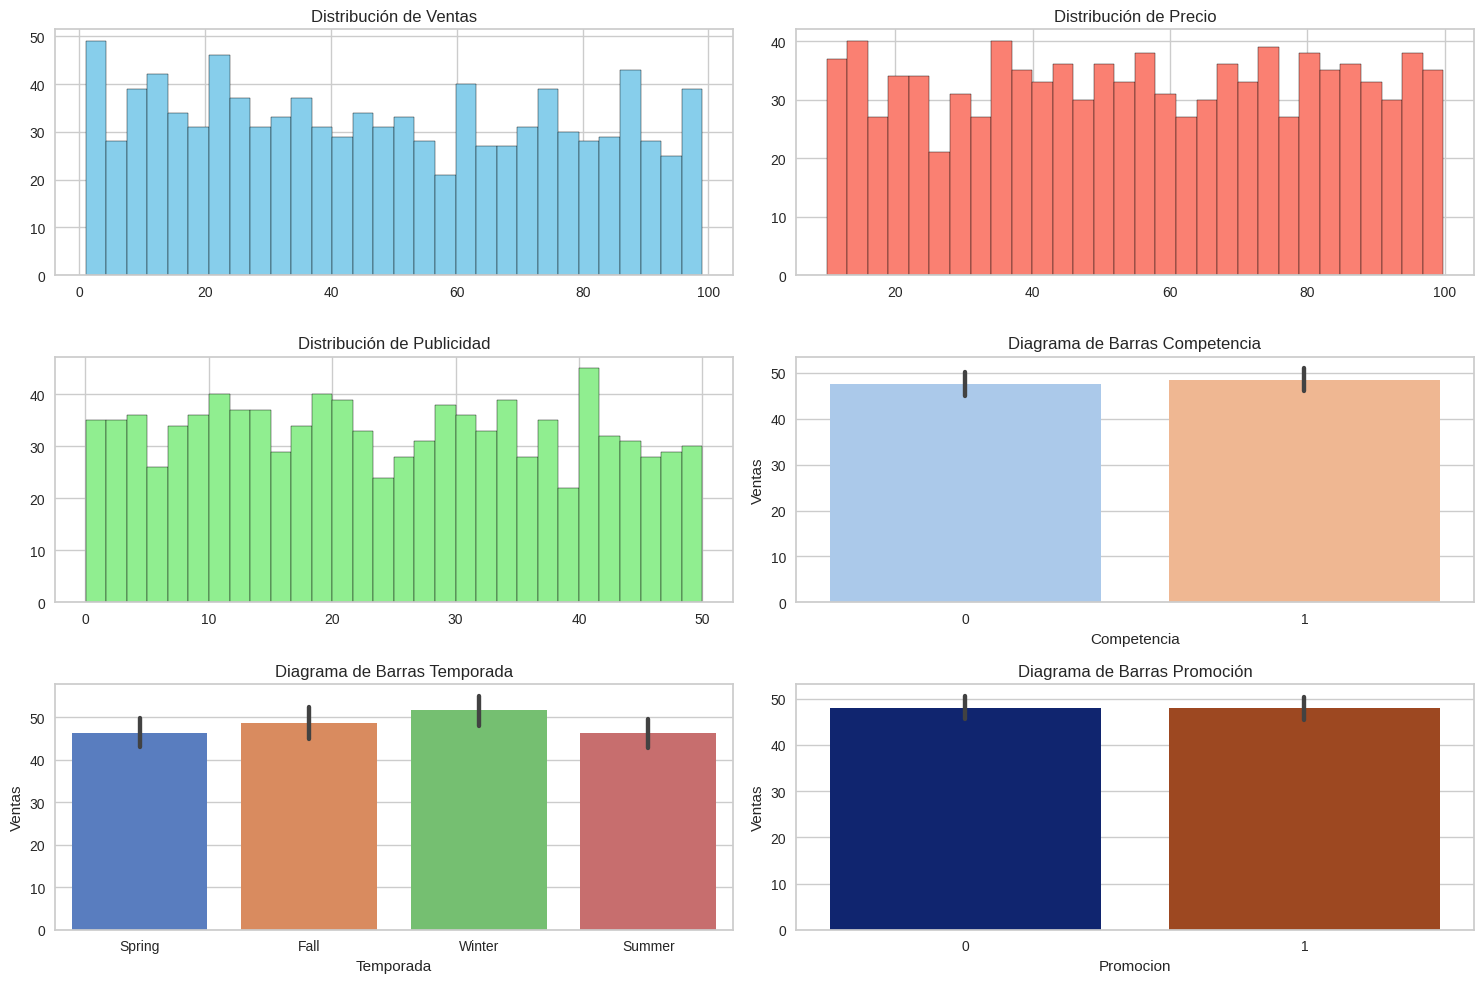

In [ ]:
# Visualización de la distribución de variables
plt.figure(figsize=(15, 10))

# Histograma de Ventas
plt.subplot(3, 2, 1)
plt.hist(df['Ventas'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')

# Histograma de Precio
plt.subplot(3, 2, 2)
plt.hist(df['Precio'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de Precio')

# Histograma de Publicidad
plt.subplot(3, 2, 3)
plt.hist(df['Publicidad'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de Publicidad')

# Diagrama de Barras de Competencia
plt.subplot(3, 2, 4)
sns.barplot(x='Competencia', y='Ventas', data=df, palette='pastel')
plt.title('Diagrama de Barras Competencia')

# Diagrama de Barras de Temporada
plt.subplot(3, 2, 5)
sns.barplot(x='Temporada', y='Ventas', data=df, palette='muted')
plt.title('Diagrama de Barras Temporada')

# Diagrama de Barras de Promoción
plt.subplot(3, 2, 6)
sns.barplot(x='Promocion', y='Ventas', data=df, palette='dark')
plt.title('Diagrama de Barras Promoción')

plt.tight_layout()
plt.show()

#PASO 4: Feature Engineering

In [ ]:
#Agregar columna objetivo

df['Ingresos'] = df['Ventas'] * df['Precio']

df.head()

,Fecha,Producto,Ventas,Precio,Publicidad,Competencia,Temporada,Promocion,Ingresos
0,2022-04-13,B,12,53.881407,2.591790,0,Spring,1,646.576889
1,2022-12-15,A,3,13.025224,27.442933,1,Fall,0,39.075672
2,2022-09-28,B,18,15.638788,14.381636,1,Fall,1,281.498190
3,2022-04-17,A,40,91.579371,15.338830,1,Spring,0,3663.174832
4,2022-03-13,C,21,22.532083,17.647925,0,Winter,0,473.173751


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Crear una copia del DataFrame original antes de realizar modificaciones
df_todas_las_variables = df.copy()

# Remover columnas extra
df = df.drop(['Fecha', 'Ventas', 'Precio'], axis=1)


In [ ]:
# Codificar la columna 'Temporada' usando LabelEncoder
le = LabelEncoder()
df['Temporada'] = le.fit_transform(df['Temporada'])
df.head()

,Producto,Publicidad,Competencia,Temporada,Promocion,Ingresos
0,B,2.591790,0,1,1,646.576889
1,A,27.442933,1,0,0,39.075672
2,B,14.381636,1,0,1,281.498190
3,A,15.338830,1,1,0,3663.174832
4,C,17.647925,0,3,0,473.173751


In [ ]:
# Codificación one-hot de la columna 'Producto'
df = pd.get_dummies(df, columns=['Producto'], prefix='Producto')


In [ ]:
#Codificación por cuartil (con el propósito de cambiar el problema a clasificación)

cuartiles_publicidad = df['Publicidad'].quantile([0.25, 0.5, 0.75])
cuartiles_ingresos = df['Ingresos'].quantile([0.25, 0.5, 0.75])

# Función para asignar el cuartil correspondiente
def asignar_cuartil(valor, cuartiles):
    if valor <= cuartiles.iloc[0]:
        return 1
    elif valor <= cuartiles.iloc[1]:
        return 2
    elif valor <= cuartiles.iloc[2]:
        return 3
    else:
        return 4

# Aplicar la función a las columnas correspondientes
df['Publicidad_por_Cuartil'] = df['Publicidad'].apply(asignar_cuartil, cuartiles=cuartiles_publicidad)
df['Ingresos_por_Cuartil'] = df['Ingresos'].apply(asignar_cuartil, cuartiles=cuartiles_ingresos)

# Eliminar las columnas originales
df = df.drop(['Publicidad', 'Ingresos'], axis=1)
# Mostrar el DataFrame con las nuevas columnas
df.head()

,Competencia,Temporada,Promocion,Producto_A,Producto_B,Producto_C,Publicidad_por_Cuartil,Ingresos_por_Cuartil
0,0,1,1,0,1,0,1,1
1,1,0,0,1,0,0,3,1
2,1,0,1,0,1,0,2,1
3,1,1,0,1,0,0,2,3
4,0,3,0,0,0,1,2,1


In [ ]:
# Reorganizar las columnas
column_order = ['Producto_A', 'Producto_B', 'Producto_C','Publicidad_por_Cuartil', 'Competencia', 'Temporada', 'Promocion', 'Ingresos_por_Cuartil']
df = df[column_order]

In [ ]:
df.head()

,Producto_A,Producto_B,Producto_C,Publicidad_por_Cuartil,Competencia,Temporada,Promocion,Ingresos_por_Cuartil
0,0,1,0,1,0,1,1,1
1,1,0,0,3,1,0,0,1
2,0,1,0,2,1,0,1,1
3,1,0,0,2,1,1,0,3
4,0,0,1,2,0,3,0,1


In [ ]:
# df.head()

#PASO 5: Selección, Entrenamiento y Evaluación del Modelo

En este paso se procederá a valerse de una librería de AutoML para agilizar la selección del modelo más adecuado.

In [ ]:
reg_setup = setup(df, target='Ingresos_por_Cuartil')
compare_models()


,Description,Value
0,Session id,474
1,Target,Ingresos_por_Cuartil
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(1000, 8)"
5,Transformed data shape,"(1000, 8)"
6,Transformed train set shape,"(700, 8)"
7,Transformed test set shape,"(300, 8)"
8,Numeric features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.2543,0.5068,0.2543,0.2510,0.2505,0.0061,0.0058,0.1460
dt,Decision Tree Classifier,0.2529,0.5074,0.2529,0.2512,0.2453,0.0042,0.0044,0.0520
rf,Random Forest Classifier,0.2529,0.5038,0.2529,0.2519,0.2498,0.0044,0.0041,0.5970
et,Extra Trees Classifier,0.2514,0.5042,0.2514,0.2496,0.2437,0.0022,0.0021,0.2330
lightgbm,Light Gradient Boosting Machine,0.2514,0.4913,0.2514,0.2495,0.2480,0.0020,0.0019,1.0750
svm,SVM - Linear Kernel,0.2486,0.0000,0.2486,0.1445,0.1510,-0.0030,-0.0163,0.0770
dummy,Dummy Classifier,0.2429,0.5000,0.2429,0.0590,0.0949,0.0000,0.0000,0.0290
knn,K Neighbors Classifier,0.2386,0.4891,0.2386,0.2386,0.2319,-0.0148,-0.0149,0.1190
ada,Ada Boost Classifier,0.2386,0.4788,0.2386,0.2379,0.2317,-0.0144,-0.0148,0.2330
qda,Quadratic Discriminant Analysis,0.2314,0.4956,0.2314,0.2211,0.2110,-0.0248,-0.0266,0.0730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

#PASO 6: Conclusiones

1. Dado que la data es ficticia, ningún modelo puede aprender patrones al respecto. En este sentido, es crucial considerar la limitación de los resultados obtenidos y reconocer que la falta de autenticidad en los datos puede afectar significativamente la capacidad de generalización del modelo a situaciones del mundo real.

2. Si fuese un entorno real, se debería recomendar al equipo gerencial recopilar más datos o revisar si existe algún problema en la base de datos. Esta sugerencia apunta a fortalecer la calidad y cantidad de la información disponible, garantizando así la robustez y confiabilidad de cualquier análisis o modelo futuro. Además, se debería realizar una exhaustiva revisión de la integridad de los datos existentes para asegurar resultados más precisos y representativos.

3. Para fines didácticos, también se podría optar por técnicas más avanzadas de generación de datos sintéticos, considerando una simulación más realista.